In [10]:
import os
from keras import layers
from keras import models
from keras import optimizers


# fill this part
from keras.preprocessing.image import ImageDataGenerator



base_dir = 'cat_dog_car_bike' # very important: do not change this!
train_dir= os.path.join(base_dir, 'train') # very important: do not change this!
validation_dir= os.path.join(base_dir, 'val') # very important: do not change this!


train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=50,
      width_shift_range=0.4,
      height_shift_range=0.4,
      shear_range=0.4,
      zoom_range=0.4,
      horizontal_flip=True,
      fill_mode='nearest')
test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(200, 200),
    batch_size=20,
    class_mode='categorical')
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(200, 200),
        batch_size=20,
        class_mode='categorical')


Found 1675 images belonging to 4 classes.
Found 835 images belonging to 4 classes.


In [11]:
from keras.applications import VGG16
conv_base = VGG16(weights='imagenet',
                  include_top=False, 
                  input_shape=(200, 200, 3))
model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(4, activation='softmax'))

conv_base.trainable = False
model.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 6, 6, 512)         14714688  
_________________________________________________________________
flatten_3 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_5 (Dense)              (None, 64)                1179712   
_________________________________________________________________
dropout_3 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 4)                 260       
Total params: 15,894,660
Trainable params: 1,179,972
Non-trainable params: 14,714,688
_________________________________________________________________


In [12]:
model.compile(loss='categorical_crossentropy',
              optimizer=optimizers.adam(lr=0.0001),
              metrics=['acc'])

history = model.fit_generator(
      train_generator,
      steps_per_epoch=80,
      epochs=30,
      validation_data=validation_generator,
      validation_steps=40)


Epoch 1/30
80/80 [==============================] - 25s 314ms/step - loss: 1.0565 - acc: 0.5455 - val_loss: 0.4595 - val_acc: 0.8963
Epoch 2/30
80/80 [==============================] - 25s 318ms/step - loss: 0.7155 - acc: 0.7223 - val_loss: 0.2302 - val_acc: 0.9132
Epoch 3/30
80/80 [==============================] - 24s 295ms/step - loss: 0.5777 - acc: 0.7799 - val_loss: 0.2082 - val_acc: 0.9132
Epoch 4/30
80/80 [==============================] - 24s 295ms/step - loss: 0.5366 - acc: 0.7793 - val_loss: 0.1754 - val_acc: 0.9094
Epoch 5/30
80/80 [==============================] - 23s 286ms/step - loss: 0.5011 - acc: 0.8050 - val_loss: 0.1979 - val_acc: 0.9170
Epoch 6/30
80/80 [==============================] - 23s 286ms/step - loss: 0.4785 - acc: 0.8189 - val_loss: 0.2806 - val_acc: 0.9421
Epoch 7/30
80/80 [==============================] - 23s 294ms/step - loss: 0.4477 - acc: 0.8150 - val_loss: 0.2548 - val_acc: 0.9233
Epoch 8/30
80/80 [==============================] - 25s 315ms/step - 

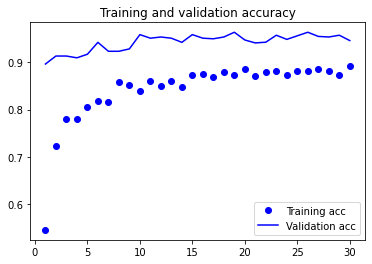

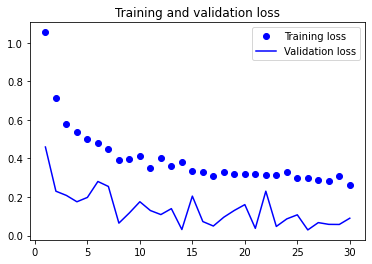

Found 200 images belonging to 4 classes.
test accuracy: 96.50%


In [14]:
model.save('modelQ5.try3') #important do not change the name of the model

import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

import numpy as np
test_dir= os.path.join(base_dir, 'test') # very important: do not change this!



datagen = ImageDataGenerator(rescale=1./255)
test_generator = datagen.flow_from_directory(
        test_dir, 
        target_size=(200, 200), 
        batch_size=20, 
        class_mode='categorical')

loss , acc = model.evaluate_generator(generator=test_generator)
print("test accuracy: {:5.2f}%".format(100*acc))